In [101]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [114]:
# 가수_장르_df.ipynb 파일 결과 csv
artist_gnr = pd.read_csv('data/artist_gnr_df.csv', index_col = 0)

#가수_w2v.ipynb 파일 결과 csv
artist_w2v_df = pd.read_csv('data/artist_w2v_df.csv', index_col = 0)

In [103]:
#gn2500의 top100 가수들.
gn2500_top100 = artist_gnr.sort_values(by = 'gn2500', ascending = False).head(100)

In [104]:
gn2500_top100.index

Index(['EXO', '동방신기 (TVXQ!)', 'SHINee (샤이니)', '신화', '소녀시대 (GIRLS` GENERATION)',
       'FTISLAND (FT아일랜드)', '방탄소년단', '인피니트', 'BIGBANG', '보아 (BoA)', '티아라',
       'god', '브라운아이드걸스', 'GOT7 (갓세븐)', 'VIXX (빅스)', '러블리즈', '젝스키스', '비투비',
       '마마무 (Mamamoo)', 'Apink (에이핑크)', '틴탑', 'Red Velvet (레드벨벳)', 'H.O.T.',
       '걸스데이', 'CNBLUE (씨엔블루)', 'S.E.S.', 'TWICE (트와이스)', '카라', '태연 (TAEYEON)',
       '몬스타엑스', '비스트', '여자친구 (GFRIEND)', '세븐틴', '핑클 (Fin.K.L)', 'B1A4', 'f(x)',
       'NCT 127', 'DAY6 (데이식스)', '서태지와 아이들', 'XIA (준수)', '원더걸스', '씨스타',
       '블락비 (Block B)', 'B.A.P', '엠블랙', '4minute', '베이비 복스', '오마이걸',
       '클릭비 (Click-B)', 'EXID', 'DIA (다이아)', '라비(RAVI)', '우주소녀', 'SS501',
       '쥬얼리', 'AOA', '제국의아이들 (ZE:A)', 'G-DRAGON', '보이프렌드', '라붐 (LABOUM)',
       'Stray Kids (스트레이 키즈)', '펜타곤', '원타임', '뉴이스트', 'WINNER', '에이프릴 (APRIL)',
       '종현 (JONGHYUN)', '아스트로 (ASTRO)', '태양', '미쓰에이', 'CLC', '효린', '애프터스쿨',
       '나인뮤지스', '이달의 소녀', '업텐션 (UP10TION)', '태민 (TAEMIN)', '2NE1', '달샤벳',
       '시크릿', 

In [105]:
#gn2500 top100 가수들의 벡터를 가져온다.
gn2500_top100_df = artist_w2v_df.loc[gn2500_top100.index]

In [106]:
kmeans = KMeans(n_clusters=6)

In [107]:
kmeans.fit(gn2500_top100_df)

KMeans(n_clusters=6)

In [108]:
#군집 결과
kmeans.labels_

array([0, 0, 0, 5, 4, 0, 0, 0, 0, 0, 4, 1, 4, 3, 0, 3, 1, 0, 0, 4, 4, 3,
       5, 4, 0, 5, 3, 4, 0, 3, 0, 3, 3, 1, 0, 4, 3, 3, 5, 0, 4, 4, 0, 0,
       4, 4, 5, 3, 1, 0, 3, 3, 3, 4, 4, 4, 4, 0, 3, 3, 3, 3, 5, 2, 0, 2,
       0, 3, 0, 4, 3, 0, 4, 4, 3, 3, 0, 4, 4, 4, 0, 3, 3, 4, 4, 3, 0, 4,
       0, 2, 4, 1, 0, 0, 3, 0, 0, 3, 2, 5])

In [109]:
# 각 군집 중심과 가장 가까운 벡터 계산
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, gn2500_top100_df)

In [110]:
closest

array([ 2, 16, 65, 47, 69, 22], dtype=int64)

In [111]:
gn2500_top100_df.iloc[closest]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
SHINee (샤이니),-0.186402,0.032459,0.201963,0.025344,-0.104237,0.384505,-0.106204,-0.124222,0.229191,0.276741,...,0.100464,0.087594,-0.104593,-0.277286,0.325050,-0.605031,0.156795,0.046709,0.368138,-0.093467
젝스키스,-0.451687,0.137069,0.161973,-0.057269,0.157222,0.797997,-0.539899,-0.801019,0.671974,0.307851,...,0.679532,-0.171487,-0.043145,-0.234886,0.400825,-0.268274,-0.292812,0.264752,0.993472,-0.369915
에이프릴 (APRIL),-0.648805,-0.284471,0.398574,-0.254582,0.590276,1.021658,0.059812,-0.331974,1.289104,0.223043,...,0.262140,0.130383,-0.373873,-0.372063,0.296243,-0.205979,-0.004411,0.487535,0.743860,-0.487927
오마이걸,-0.440829,-0.001026,0.248904,-0.042343,0.077008,0.370622,-0.190258,-0.059240,0.543828,0.332294,...,0.062366,0.091975,-0.081018,-0.100633,0.260532,-0.297191,0.002852,0.003866,0.286555,-0.125965
미쓰에이,-0.296547,-0.150032,-0.026748,0.015553,0.052029,0.515532,-0.089677,-0.500666,0.411755,0.354093,...,0.082103,-0.108834,0.110100,-0.409705,0.079375,-0.335729,0.104064,0.362046,0.527320,-0.305141
H.O.T.,-0.354544,-0.142586,-0.028313,0.070725,-0.221196,0.326957,-0.282742,-0.649096,0.367869,0.371337,...,0.174227,0.012199,-0.440350,-0.002676,0.293018,-0.316779,-0.074243,0.091962,0.639452,-0.379300


In [112]:
gn2500_top100_df['label'] = kmeans.labels_

In [113]:
# 군집 확인
for i in range(6):
    print(f'{i}번 군집 :')
    print(gn2500_top100_df[gn2500_top100_df['label']== i].index, '\n')

0번 군집 :
Index(['EXO', '동방신기 (TVXQ!)', 'SHINee (샤이니)', 'FTISLAND (FT아일랜드)', '방탄소년단',
       '인피니트', 'BIGBANG', '보아 (BoA)', 'VIXX (빅스)', '비투비', '마마무 (Mamamoo)',
       'CNBLUE (씨엔블루)', '태연 (TAEYEON)', '비스트', 'B1A4', 'XIA (준수)',
       '블락비 (Block B)', 'B.A.P', 'EXID', 'G-DRAGON', 'WINNER', '종현 (JONGHYUN)',
       '태양', '효린', '태민 (TAEMIN)', '가인', 'iKON', 'JYJ', '양요섭', '루나 (LUNA)',
       '김성규', '정은지'],
      dtype='object') 

1번 군집 :
Index(['god', '젝스키스', '핑클 (Fin.K.L)', '클릭비 (Click-B)', '샤크라'], dtype='object') 

2번 군집 :
Index(['뉴이스트', '에이프릴 (APRIL)', '더보이즈 (THE BOYZ)', '베리굿 (BerryGood)'], dtype='object') 

3번 군집 :
Index(['GOT7 (갓세븐)', '러블리즈', 'Red Velvet (레드벨벳)', 'TWICE (트와이스)', '몬스타엑스',
       '여자친구 (GFRIEND)', '세븐틴', 'NCT 127', 'DAY6 (데이식스)', '오마이걸', 'DIA (다이아)',
       '라비(RAVI)', '우주소녀', '보이프렌드', '라붐 (LABOUM)', 'Stray Kids (스트레이 키즈)',
       '펜타곤', '아스트로 (ASTRO)', 'CLC', '이달의 소녀', '업텐션 (UP10TION)', 'SF9', '드림캐쳐',
       '엔플라잉 (N.Flying)', '청하', 'Wanna One (워너원)'],
      dtype='object

# PCA로 차원축소 후에 군집화하여 시각화

In [98]:
#gn2500 top100 가수들의 벡터를 가져온다.
gn2500_top100_df = artist_w2v_df.loc[gn2500_top100.index]

In [99]:
pca = PCA(n_components=2)
gn2500_pca = pca.fit_transform(gn2500_top100_df)

In [100]:
gn2500_pca_df = pd.DataFrame(gn2500_pca, index= gn2500_top100_df.index)

In [73]:
kmeans_pca = KMeans(n_clusters=6)
kmeans_pca.fit(gn2500_pca_df)

KMeans(n_clusters=6)

In [75]:
# 각 군집 중심과 가장 가까운 벡터 계산
closest, _ = pairwise_distances_argmin_min(kmeans_pca.cluster_centers_, gn2500_pca_df)
gn2500_pca_df.iloc[closest]

,0,1
S.E.S.,-1.079581,0.043787
세븐틴,0.883519,-0.657380
루나 (LUNA),0.337571,0.009789
CLC,1.120044,0.848361
가인,-0.439582,-0.393336
티아라,-0.645341,1.333826


In [76]:
gn2500_pca_df['label'] = kmeans_pca.labels_

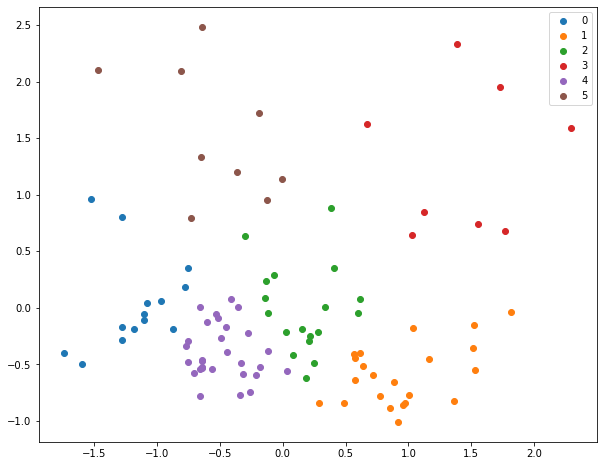

In [96]:
plt.figure(figsize = (10,8))
for i in range(6):
    plt.scatter(gn2500_pca_df[gn2500_pca_df['label'] == i][0],
               gn2500_pca_df[gn2500_pca_df['label'] == i][1],
               label = i)
plt.legend()
plt.show()

In [94]:
for i in range(6):
    print(f'{i}번 군집 :')
    print(gn2500_pca_df[gn2500_pca_df['label']== i].index, '\n')

0번 군집 :
Index(['신화', '브라운아이드걸스', 'H.O.T.', 'S.E.S.', '카라', '핑클 (Fin.K.L)', '서태지와 아이들',
       '베이비 복스', '클릭비 (Click-B)', 'SS501', '쥬얼리', '원타임', '애프터스쿨', 'JTL'],
      dtype='object') 

1번 군집 :
Index(['방탄소년단', 'GOT7 (갓세븐)', 'Red Velvet (레드벨벳)', 'TWICE (트와이스)', '몬스타엑스',
       '여자친구 (GFRIEND)', '세븐틴', 'DAY6 (데이식스)', '오마이걸', 'DIA (다이아)', '라비(RAVI)',
       '우주소녀', 'Stray Kids (스트레이 키즈)', '펜타곤', '아스트로 (ASTRO)', '이달의 소녀',
       '업텐션 (UP10TION)', 'SF9', '엔플라잉 (N.Flying)', 'iKON', '청하',
       'Wanna One (워너원)'],
      dtype='object') 

2번 군집 :
Index(['EXO', '러블리즈', '비투비', '마마무 (Mamamoo)', 'Apink (에이핑크)', 'B1A4', 'B.A.P',
       'EXID', 'AOA', '보이프렌드', 'WINNER', '종현 (JONGHYUN)', '효린', '태민 (TAEMIN)',
       '헬로비너스', '양요섭', '루나 (LUNA)', '김성규'],
      dtype='object') 

3번 군집 :
Index(['NCT 127', '라붐 (LABOUM)', '뉴이스트', '에이프릴 (APRIL)', 'CLC', '드림캐쳐',
       '더보이즈 (THE BOYZ)', '베리굿 (BerryGood)'],
      dtype='object') 

4번 군집 :
Index(['동방신기 (TVXQ!)', 'SHINee (샤이니)', '소녀시대 (GIRLS` GENERATION)',
    